In [1]:
# load the data

import os
import glob 
from matplotlib.pyplot import rc_context
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

import pickle  #upper threshold 값들을 저장하고 불러오기 위해서.

In [2]:
adata = sc.read_h5ad('data/results/11162021_19visium_pca.h5ad')


In [3]:
adata_harmonry = adata.copy()


In [5]:
sc.external.pp.harmony_integrate(adata_harmonry, key = 'sample')

2021-11-18 07:17:21,322 - harmonypy - INFO - Iteration 1 of 10
2021-11-18 07:17:33,357 - harmonypy - INFO - Iteration 2 of 10
2021-11-18 07:17:45,417 - harmonypy - INFO - Converged after 2 iterations


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:15)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:21)


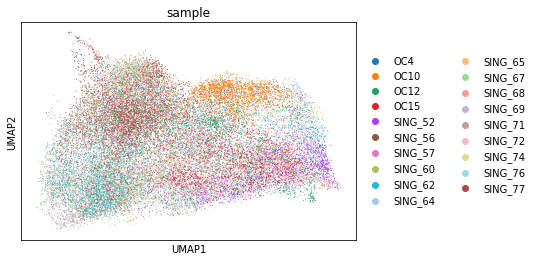

In [6]:
sc.pp.neighbors(adata_harmonry, n_pcs = 30, use_rep = 'X_pca_harmony')
sc.tl.umap(adata_harmonry)
sc.pl.umap(adata_harmonry, color = 'sample')

In [7]:
sc.tl.leiden(adata_harmonry)


running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:08)


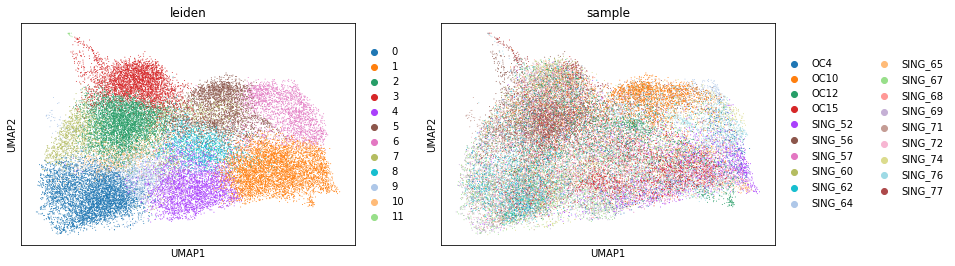

In [8]:
sc.pl.umap(adata_harmonry, color=['leiden', 'sample'])

In [9]:
adata_bbknn = adata.copy()


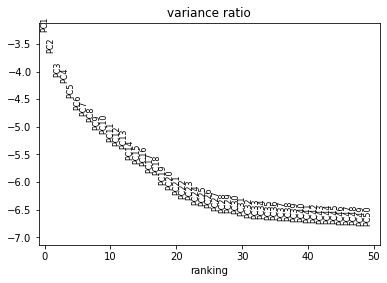

In [10]:
sc.pl.pca_variance_ratio(adata_bbknn, log=True, n_pcs = 50)


In [11]:
sc.pp.neighbors(adata_bbknn, n_pcs = 40)


computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:23)


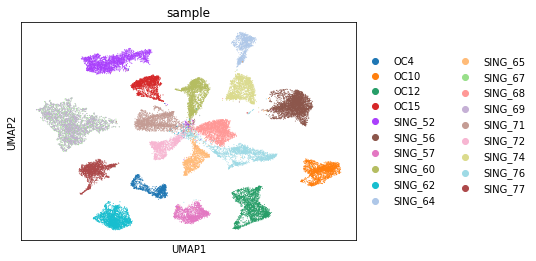

In [12]:
sc.tl.umap(adata_bbknn)
sc.pl.umap(adata_bbknn, color = 'sample')

In [15]:
%%time
sc.external.pp.bbknn(adata_bbknn, batch_key='sample')

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:12)
CPU times: user 12.9 s, sys: 62.7 ms, total: 12.9 s
Wall time: 12.7 s


In [18]:
sc.tl.umap(adata_bbknn)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:30)


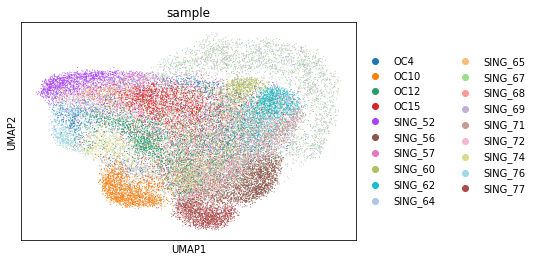

In [19]:
sc.pl.umap(adata_bbknn, color=['sample'])


In [21]:
sc.tl.leiden(adata_bbknn)


running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:25)


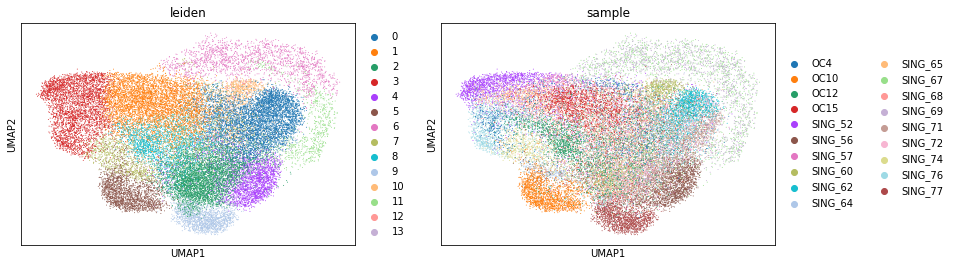

In [22]:
sc.pl.umap(adata_bbknn, color=['leiden', 'sample'])

## Combat 

In [23]:
#from load_raw_data import *
from matplotlib.pyplot import rc_context
#from data_load_19 import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import anndata
import scanpy as sc

In [26]:
# Load the stored data object
save_file = './data/results/qc_tutorial_2.h5ad'
adata = sc.read_h5ad(save_file)

In [27]:
adata

AnnData object with n_obs × n_vars = 32478 × 4313
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'feature_types', 'genome', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'neighbors', 'pca', 'sample_colors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [28]:
# create a new object with lognormalized counts
adata_combat = sc.AnnData(X=adata.raw.X, var=adata.raw.var, obs = adata.obs)


In [30]:
# run combat
sc.pp.combat(adata_combat, key='sample')

Standardizing Data across genes.

Found 19 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments



/home/ubuntu/pyenv/lib/python3.8/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in true_divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


Adjusting data



extracting highly variable genes
    finished (0:00:12)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Highly variable genes: 4600


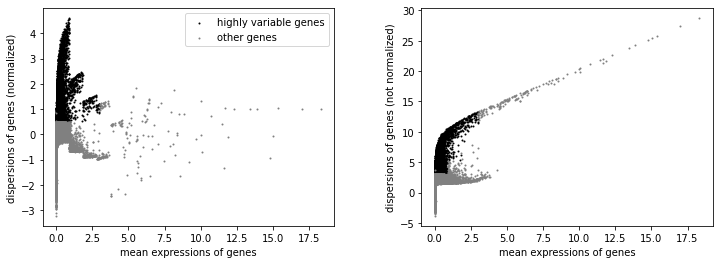

In [31]:
sc.pp.highly_variable_genes(adata_combat)
print("Highly variable genes: %d"%sum(adata_combat.var.highly_variable))
sc.pl.highly_variable_genes(adata_combat)


In [36]:
sc.pp.pca(adata_combat, n_comps=30, use_highly_variable=True, svd_solver='arpack')


computing PCA
    on highly variable genes
    with n_comps=30
    finished (0:00:21)


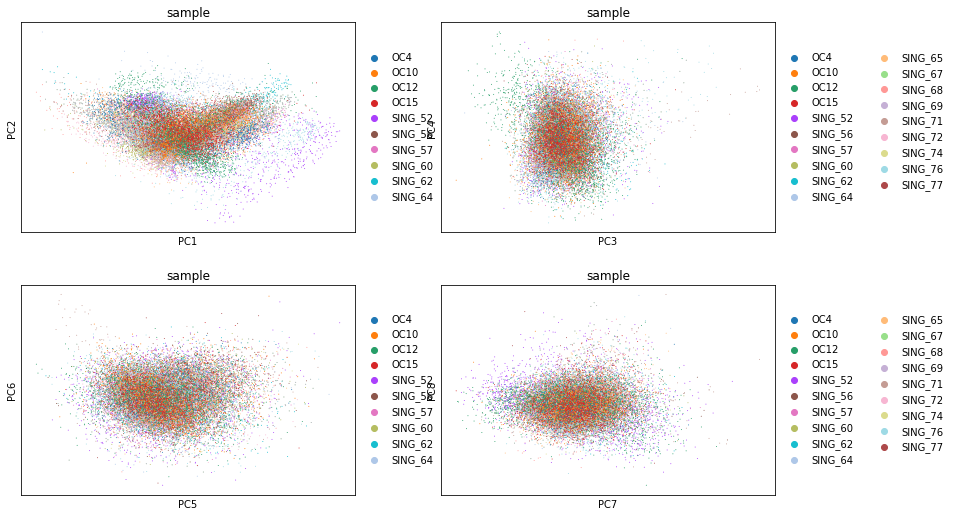

In [37]:
sc.pl.pca(adata_combat, color='sample', components = ['1,2','3,4','5,6','7,8'], ncols=2)


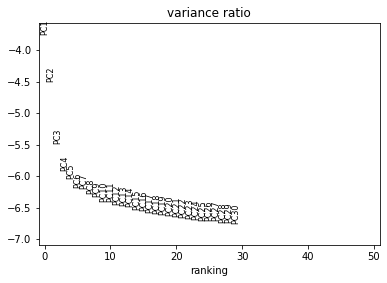

In [38]:
sc.pl.pca_variance_ratio(adata_combat, log=True, n_pcs = 50)


In [39]:
sc.pp.neighbors(adata_combat, n_pcs =30)

sc.tl.umap(adata_combat)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:20)


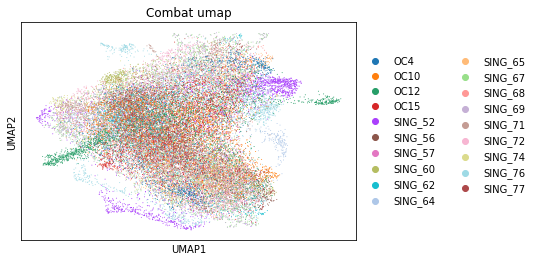

In [40]:
#sc.pl.umap(corr_data, color="sample", title="MNN umap", ax=axs[1,0], show=False)
sc.pl.umap(adata_combat, color="sample", title="Combat umap")

In [41]:
sc.tl.leiden(adata_combat)


running Leiden clustering
    finished: found 22 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:06)


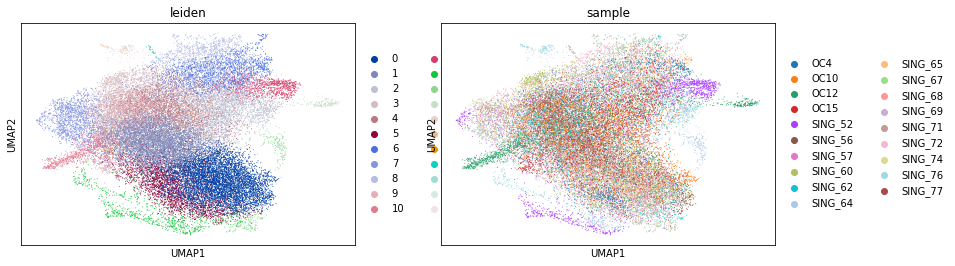

In [42]:
sc.pl.umap(adata_combat, color=['leiden', 'sample'])